[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ciri/iese-dsfb/blob/main/notebooks/100-HowComputersSee.ipynb)

# How Computers See - Sol

Today we'll discover how computers 'see' images - the first step in understanding modern applications like Tesla's self-driving cars. Every digital image, whether from your phone or a security camera, is just a three-dimensional array of numbers representing colors and brightness. We'll learn how to load and manipulate these arrays in Python, skills that will be essential when working with any kind of structured data later in the course. By the end of this session, you'll be able to extract information from images and even build a simple product recommendation system based on color similarity, showing how basic data operations can already create business value.

## Installing the required packages

In [112]:
# this is to make plots prettier, you can ignore this.
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'none'

We will be using the OpenCV package, a real-time optimized Computer Vision library, and set of tools and hardware. To install it, please execute the following command:

In [113]:
! pip3 install opencv-python
# can also try:
#! conda install -c anaconda py-opencv -y

The exclamation mark at the start of the command signifies that it is not a Python code, but rather a command being directed to the shell of your operating system. We are instructing it to install the OpenCV package. If the installation process completes without errors,  you should be able to execute the subsequent import statements without any difficulties:

In [114]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

Unlike pandas, we `numpy` does not natively load code to plot data. We therefore load the `matplotlib` library which will help us do just that.

The ``%``  symbol, on the other hand, denotes a command that is specific to the Jupyter lab/notebook environment. In this case, we are requesting it to display images within the notebook instead of opening a new window.

## Loading images

Loading an image into a numpy array is as easy as running the two lines below. Note that this code assumes that there is a file called `forest.jpeg` in a subfolder `resources` of the folder where the code is run. Not specifying the folder correctly is a common source of errors when working with python. You can [download the image here](/www/resources/forest.jpeg).

In [115]:
# Load the image in a numpy array, we're downloading it from the internet
# so we need to use the requests library to get the image
import requests
url       = 'https://raw.githubusercontent.com/ciri/iese-dsfb/main/images/forest.jpeg'
raw_image = cv2.imdecode(np.frombuffer(requests.get(url).content, np.uint8), cv2.IMREAD_COLOR)
im        = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)

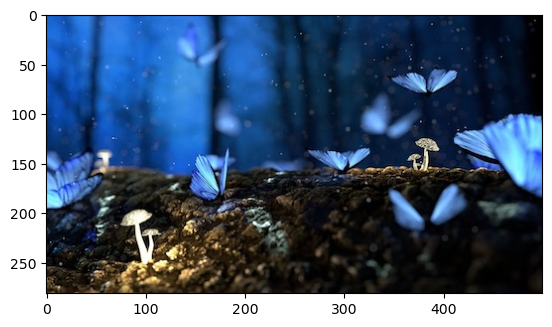

In [116]:
im.shape

plt.imshow(im)

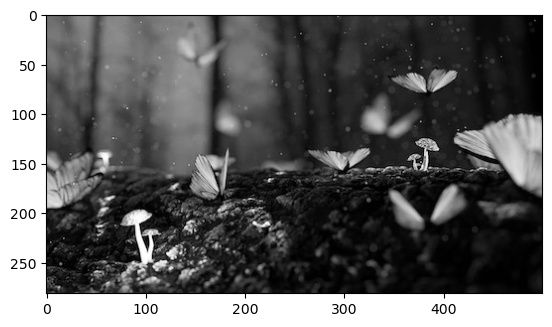

In [117]:
bw_img = np.mean(im, axis=2)
plt.imshow(bw_img) # 0-255
plt.imshow(bw_img, cmap='grey')

If you're getting an eeror saying: 

    error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Make sure to place the image file in the correct folder. It should be in a subdirectory called resources of the current directory (the one that your jupyter notebook is located in). If you don't know which one that is, try one of these commands:

Mac:

    ! pwd

Windows:

    ! cd

The first line of our previous code loads the image into a numpy matrix, and the second one specifies which color encoding mechanism ``cv`` should be using. Here, we tell it to use the RGB triplet system (``cv2.COLOR_BGR2RGB``).

To understand what this actually does, we need to go on a brief detour in Computer Science.

## How computers represent images.

When you take a photo with a digital camera, light strikes a sensor array organized in a grid, capturing the intensities of light in each cell. These intensities are then converted into numerical values and saved onto storage media. Here's a simplified breakdown of the process:

1. Light from the scene enters through the lens, which filters out most of the UV light.
2. An infrared filter eliminates infrared wavelengths to ensure accurate color reproduction.
3. The remaining light hits a sensor grid that records the intensities of Red, Green, and Blue colors, usually by passing through color filters before the sensor.
4. These RGB color intensities are then stored on the camera's storage media, often a hard drive or SD card.

<center>
    <img src="./resources/Inside-a-Digital-Camera.png" width="70%">
</center>

When you're ready to work with this image in a computational environment like Python, it's typically read into a multi-dimensional array. Each cell in this array corresponds to a pixel, holding numbers that represent color and intensity.` Images are stored in a matrix of **pixels**, where each pixel represents a single point of color on a canvas. In NumPy, an image matrix is represented as a three-dimensional array, with one dimension for the row index, one for the column index, and one for the color channel. 

Typically, each pixel will not just be one number, but a triplet of three numbers instead (one for Red, Green, and Blue respectively). This is called the **additive coloring mechanism** and it involves mixing a triplet of these three numbers ranging from 0 to 255 to form a color. This representation is commonly used to both store, but also reproduce colors in digital images.

Let us inspect the image that we have loaded.

In [118]:
im.shape

(281, 500, 3)

In [119]:
np.min(im)

0

In [120]:
np.max(im)

255

In [121]:
im.dtype

dtype('uint8')

In [122]:
type(im[0,0,0])

numpy.uint8

To assign a specific color to a pixel in an image, we could manipulate the corresponding value in the matrix. For example, if we want to make a pixel at row 100 and column 50 completely blue, we can set the red and green color channels to 0 and the blue color channel to 255 as follows:


``im[100,50,:] = [0,0,255] ``


Similarly, the color magenta can be represented by setting the red and blue color channels to 255 and the green color channel to 0 as follows:


``im[100,50,:] = [255,0,255] ``

Sometimes, images are specified as being **black-and-white**. In this case, we represent the image as a single number which indicicates the intensity of white (0 = black, 255 = full white). To represent a gray pixel, we would set the channel to some intermediary value:

``im_bw[100,50] = 125 ``


*It is worth noting that while images are often stored in this raw pixel format, it is typically possible and desirable to compress images to reduce their size using techniques such as the Joint Photographic Experts Group standards (JPG/JPEG). However, for the purposes of this discussion, we will only consider raw images in Python.*

To conclude: the image that we loaded contains 281 rows and 500 columns of pixels. Each pixels has 3 values and a minimum of 0 and a maximum of 255. The type of the array is uint8 (a value from 0-255). This type is memory efficient, but you must keep in mind that the you should *never* store a value that is outside of this range in the matrix. If you do so, it will lead to unexpected results:

In [123]:
np.uint8(258)

/tmp/ipykernel_102609/3685978374.py:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 258 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  np.uint8(258)


2

Wow! This is called an [overflow](https://en.wikipedia.org/wiki/Integer_overflow), we won't go deeper into overflows, but as you can see it can lead to very peculiar results. This is the worst kind of bug one can introduce: a bug that is silent (does not throw an error or warning). To avoid it, ensure that you take care to not put really big numbers in things that can't hold them.

### Displaying images

Let us now show the image using the ``imshow`` command which - conveniently - takes as input a pixel matrix. 

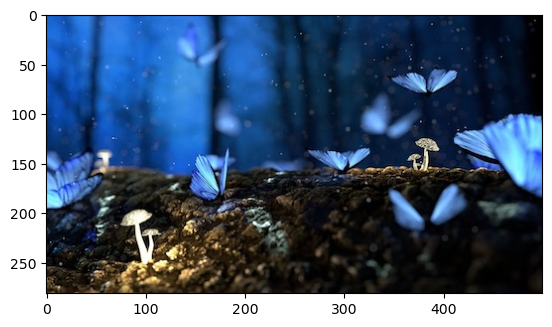

In [124]:
plt.imshow(im)
plt.show()

**You try it:**

Try showing just the bottom left corner of the images.

1. Check the size of the image, divide by 2 to get the quarters.
2. Use matric indexing to focus the image

In [125]:
print(im.shape)




(281, 500, 3)


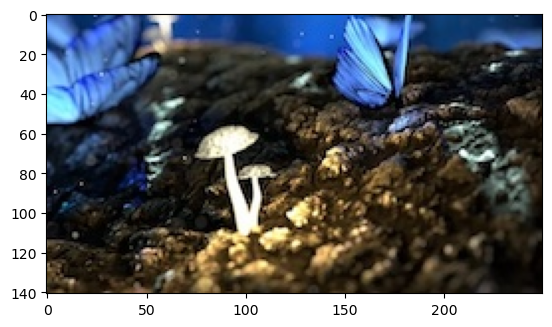

In [126]:
im2 = im[140:,:250,:]
plt.imshow(im2)
plt.show();

**You try it:**

Which channel is likely going to have the most intense values in the above picture: red, green, or blue?

We can find out numerically, by checking the average (`mean`) of each channel:

In [127]:
im[:,:,2]

array([[202, 202, 201, ...,   0,   0,   0],
       [203, 203, 202, ...,   0,   0,   0],
       [206, 204, 203, ...,   0,   0,   0],
       ...,
       [ 52,  29,  13, ...,  10,  11,  11],
       [ 38,  32,  25, ...,   6,   7,   7],
       [ 17,  25,  38, ...,   3,   4,   6]], dtype=uint8)

In [128]:
# This is red, you try it for the other ones.
red = im[:,:,0]

np.mean(red), red.mean()

(34.57708896797153, 34.57708896797153)

In [129]:
im[:,:,0].mean(), im[:,:,1].mean(), im[:,:,2].mean()

(34.57708896797153, 58.36701779359431, 88.90013523131672)

In [130]:
# Alternatively:
im.mean(axis=0).mean(axis=0)

# Alternatively:
im.mean(axis=(0,1))

array([34.57708897, 58.36701779, 88.90013523])

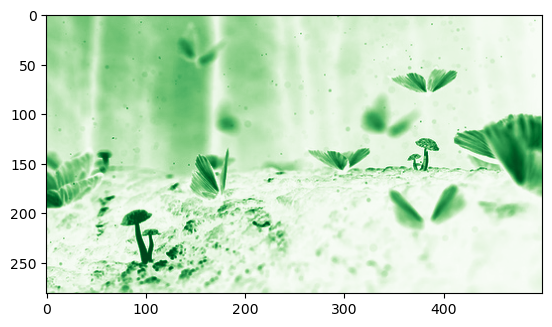

In [134]:
plt.imshow(im[:,:,0], cmap='Reds')
plt.imshow(im[:,:,2], cmap='Blues')
plt.imshow(im[:,:,1], cmap='Greens')

We can also plot a specific channel setting the other channels to 0.

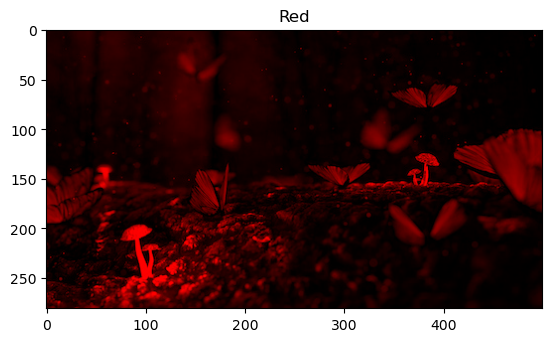

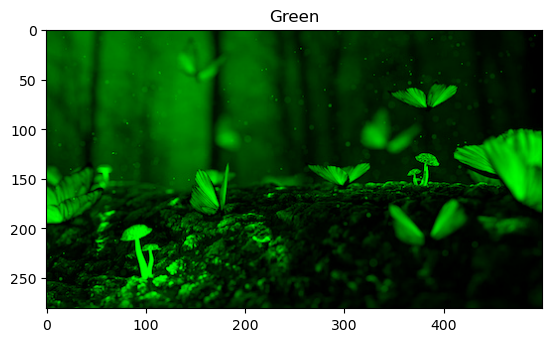

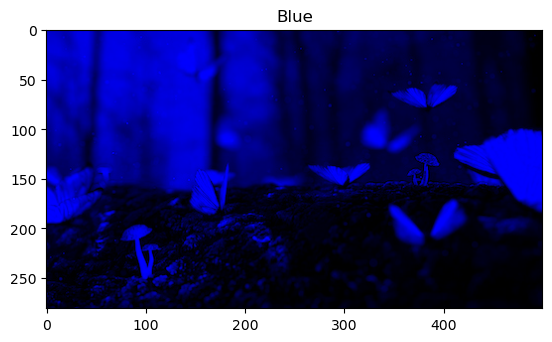

In [94]:
# loop through tuples (Red,0), (Green,1), (Blue,2)
for name, channel in zip(['Red','Green','Blue'],range(3)):
    # We make a copy so as to not destroy the original image
    channel_intensity = im.copy()

    # Recognize the channel, set the other ones equal to zero
    if(channel == 0):
        channel_intensity[:,:,1] = 0
        channel_intensity[:,:,2] = 0
    if(channel == 1):
        channel_intensity[:,:,0] = 0
        channel_intensity[:,:,2] = 0
    if(channel == 2):
        channel_intensity[:,:,0] = 0
        channel_intensity[:,:,1] = 0
    
    # Plot using the matlotlib library
    plt.title(name)
    plt.imshow(channel_intensity)
    plt.show()

We can convert a color image to a black-and-white image by taking the average accross all channels.

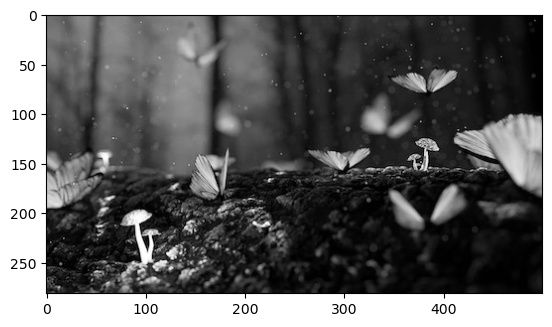

In [19]:
im_bw = np.mean(im,axis=2)

plt.imshow(im_bw, cmap='gray')
plt.show()

## Mini-Case: building a data product for Zara

Fashion retailer Zara needs to improve their product recommendations for their online store. While they eventually want to use sophisticated AI, they decide to start with a simple proof-of-concept: recommending t-shirts based on color similarity. When a customer views a t-shirt, the system should suggest other t-shirts with similar colors.

The marketing team estimates that even this simple system could increase their cross-selling by 5% by making it easier for customers to find color variations they like. With average t-shirt revenue of €2M per month, that's an additional €100K monthly revenue for a very simple technical solution.

Exercise:

1. Download the [tshirts dataset](/www/resources/tshirts.zip), and unzip it in a folder that is accessible.
2. Complete the `calculate_average_color()` function.
3. Ask ChatGPT to explain how the `find_similar_tshirts()` function works.

**Step 1**: download and unzip in a path that is accessible to python

In [100]:
TSHIRTS_PATH = '../resources/tshirts' # specify where you placed your tshirts here

**Step 2**: complete this function, maybe try it out on the image that you have already loaded first. The output should be the average red, blue and green content:

- Input: image matrix
- Output: 3x1 vector with the 3 means

If you just want to see what we're working towards, feel free to leave this as is for now.

In [101]:
def calculate_average_color(image_path):
    img = cv2.imread(str(image_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized_img = img[::16]

    # returns the average color accross all image channels of the resized image
    avg_color = 123
    
    return avg_color

In [106]:
def calculate_average_color(image_path):
    img = cv2.imread(str(image_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized_img = img[::16]

    # returns the average color accross all image channels of the resized image.
    avg_color = resized_img.mean(axis=0).mean(axis=0)
    
    # This is the same thing but written more succintly, verify!
    # avg_color = resized_img.mean(axis=(0,1))    

    return avg_color


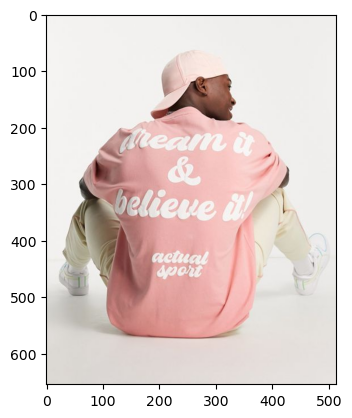

In [107]:
# Example image
image1 = '../resources/tshirts/1.jpg'

original_img = cv2.imread(str(image1))
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

plt.imshow(original_img);

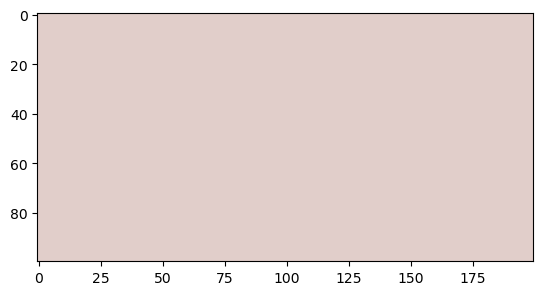

In [104]:
avg_color = calculate_average_color(image1) / 255
rect = np.ones((100, 200, 3)) * avg_color
plt.imshow(rect)
plt.show()

**Step 3**: run the image recommendation system.

If you want to learn more about this code, ask an LLM like ChatGPT like this:

> I'm learning Python, and I have a code that I'm trying to understand step-by-step. It involves loading and displaying images of t-shirts, comparing their colors, and recommending similar-looking t-shirts based on color similarity. Could you help me understand this code at different levels of depth?
>
> [paste the code here]


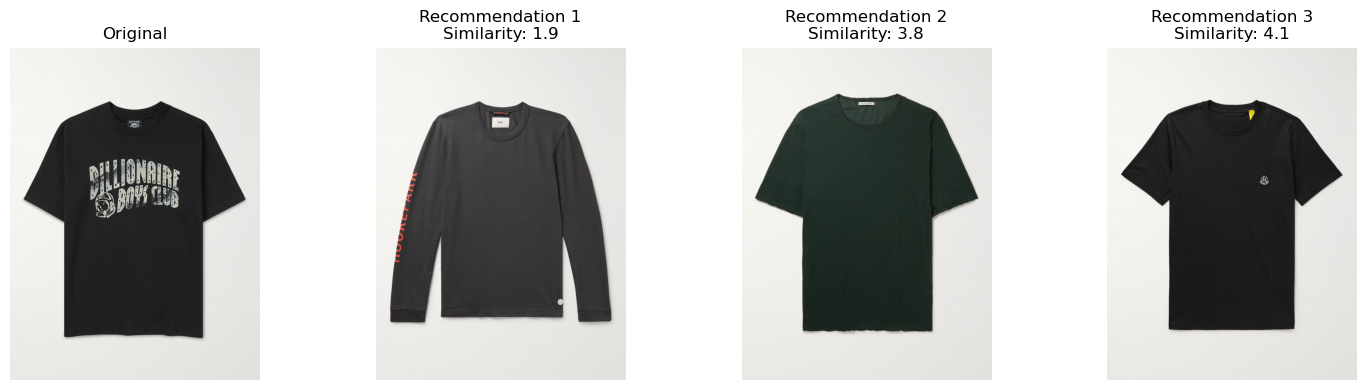

In [110]:
import cv2
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt

# A function to load all thsirt image file names
# Load all t-shirt image file names from the folder
def load_tshirt_images(folder_path):
    image_files = [filename for filename in os.listdir(folder_path) if filename.lower().endswith('.jpg')]
    return image_files

# Explain me ...
def find_similar_tshirts(target_color, all_tshirts, folder_path, num_recommendations=3):
    similarities = []    
    for tshirt_file in all_tshirts:
        tshirt_path = Path(folder_path) / tshirt_file
        tshirt_color = calculate_average_color(tshirt_path)        
        similarity = np.sqrt(np.sum((target_color - tshirt_color) ** 2))
        similarities.append((tshirt_file, similarity))    
    similarities.sort(key=lambda x: x[1])    
    return similarities[1:num_recommendations+1]

def plot_recommendations(target_file, folder_path):
    # Get all t-shirts and calculate recommendations
    all_tshirts     = load_tshirt_images(folder_path)
    target_path     = Path(folder_path) / target_file
    target_color    = calculate_average_color(target_path)
    similar_tshirts = find_similar_tshirts(target_color, all_tshirts, folder_path)
    
    # Create figure with 4 subplots (original + 3 recommendations)
    _, axes = plt.subplots(1, 4, figsize=(15, 4))
    
    # Plot original
    original_img = cv2.imread(str(target_path))
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    axes[0].imshow(original_img)
    axes[0].set_title('Original')
    axes[0].axis('off')
    
    # Plot recommendations
    for idx, (tshirt, similarity) in enumerate(similar_tshirts, 1):
        img_path = Path(folder_path) / tshirt
        img = cv2.imread(str(img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[idx].imshow(img)
        axes[idx].set_title(f'Recommendation {idx}\nSimilarity: {similarity:.1f}')
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()


# Example usage:
all_tshirts = load_tshirt_images(TSHIRTS_PATH)
if all_tshirts:
    plot_recommendations(all_tshirts[2], TSHIRTS_PATH)


## BONUS: Moving Images

Moving images (video's, GIFs, webcam data, etc) are just a sequence of individual images that are shown in rapid succession at a certain frame rate.

<center><img src="https://raw.githubusercontent.com/ciri/iese-dsfb/main/images/ring-cool.gif" style="padding:10px;" /></center>

Let's try to investigate the matrices for this particular image. Don't worry too much about the code below. We won't be explaining it in detail but it essentially loads the GIF image in an numpy array in memory. The picture I used is [available here](/www/resources/ring-cool.gif)

In [135]:
# Boilerplate code to open a GIF sequence.
# You don't need to worry about this code
# too much.

from PIL import Image, ImageSequence
import numpy as np

def load_frames(image: Image, mode='RGB'):
    return np.array([
        np.array(frame.convert(mode))
        for frame in ImageSequence.Iterator(image)
    ])

with Image.open("../images/ring-cool.gif") as im:
    frames = load_frames(im)
    it = ImageSequence.Iterator(im)

In [138]:
frames[0,:,:,:,:].shape

(273, 498, 3)

It looks like we have 51 individual images inside of this one GIF container. Each image has 273 rows and 498 columns with RGB data. Let's show the first 16:

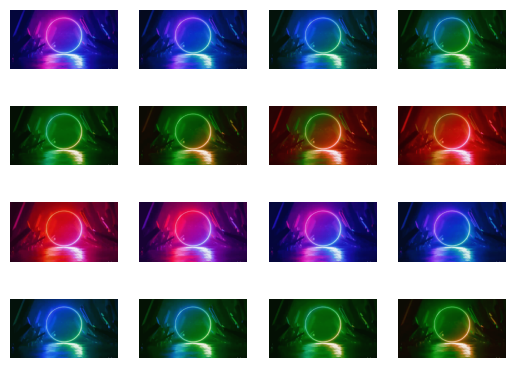

In [137]:
fig, axs = plt.subplots(4,4)
for i,frame in enumerate(frames[:16]):    
    ax =axs[int(i/4),int(i%4)]
    ax.imshow(frame);
    ax.axis('off');

Looks like maybe only the first 10 were really required here ...

## BONUS: Procedural Art

Image manipulation at the pixel-level as we've done in this session is a core part of procedural art, a fascinating intersection of creativity and computation. This form of art involves the use of algorithmic processes, often involving pixel manipulation, to generate unique and intricate designs. The beauty of procedural art lies in its unpredictability and the infinite possibilities it presents, as the same set of rules can yield vastly different results each time.

A notable figure in this field is Vera Molnár, a pioneer of computer and procedural art. Molnár's work often involved the manipulation of simple geometric shapes, using algorithms to create complex, visually striking images. Her art serves as a compelling example of how procedural techniques can be used to manipulate pixels and create intricate patterns and designs. By exploring and manipulating the fundamental building blocks of digital images - pixels - artists like Molnár have expanded the boundaries of what is possible in the realm of digital art. Or as Vera puts it: *"I use simple shapes because they allow me step by step control over how I create the image arrangement. Thus, I can try to identify the exact moment when the evidence of art becomes visible. In order to guarantee the systematic nature of this research, I use a computer."*

For a modern interpretation check out <a href="https://refikanadol.com/">Refik Anadol</a>'s work.

<center>
    <img src="https://raw.githubusercontent.com/ciri/iese-dsfb/main/images/vera-molnar-1961.webp" style="padding:10px;width:25%"/><br/>
    <i>Fig. Vera Molnár in 1961 Courtesy of Galerie Oniris - Rennes</i>
</center>